In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle
import streamlit as st

In [118]:
df = pd.read_csv(r"C:\\Users\\jadha\\OneDrive\\Desktop\\PBL-project\\final_more_modified_student_performance_data.csv")
df

,Student ID,Name,Class,Marks,Family Background,Family Educational Background,Attendance (%),Behavior,Viva Performance,Submission,...,Hobby,Academic Attributes,Behavioral Attributes,Socioeconomic Attributes,Psychological and Emotional,Technology Usage,Peer Interactions,Cognitive Attributes,Communication Skills,Learning Progression
0,1,Rahul More,9,NaN,NaN,Father high school graduate,90.0,Poor,Good,Late,...,Reading,Marks: 60,Time Management: Good,Socioeconomic: Middle class,"Stress: Low, Confidence: High",NaN,Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
1,2,Aarav Deshmukh,10,62.0,Upper class,Mother high school graduate,NaN,Excellent,Excellent,Late,...,Reading,Marks: 62,Time Management: Good,Socioeconomic: Upper class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
2,3,Rahul More,11,90.0,NaN,Father high school graduate,85.0,Good,Average,Late,...,Playing Tennis,Marks: 90,Time Management: Good,Socioeconomic: Middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
3,4,Ananya Kulkarni,9,NaN,Upper-middle class,Father high school graduate,97.0,Average,Good,On time,...,NaN,Marks: 65,Time Management: Good,Socioeconomic: Upper-middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
4,5,Vishal Chavan,10,60.0,Lower class,Both parents college graduates,87.0,Excellent,NaN,On time,...,Playing Tennis,Marks: 60,Time Management: Good,Socioeconomic: Lower class,NaN,"EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Meera Bhosale,12,89.0,Upper-middle class,Both parents college graduates,81.0,Good,Excellent,Late,...,Playing Tennis,NaN,Time Management: Good,NaN,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
96,97,Aishwarya Sawant,10,NaN,Lower class,Father high school graduate,97.0,Poor,NaN,On time,...,Traveling,Marks: 82,Time Management: Good,Socioeconomic: Lower class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
97,98,Aishwarya Sawant,11,71.0,Upper class,Father high school graduate,86.0,Good,Excellent,Late,...,Playing Guitar,Marks: 71,Time Management: Good,Socioeconomic: Upper class,NaN,"EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
98,99,Meera Bhosale,12,79.0,Upper-middle class,Mother high school graduate,87.0,Excellent,NaN,On time,...,Playing Guitar,Marks: 79,Time Management: Good,Socioeconomic: Upper-middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student ID                     100 non-null    int64  
 1   Name                           100 non-null    object 
 2   Class                          100 non-null    int64  
 3   Marks                          77 non-null     float64
 4   Family Background              90 non-null     object 
 5   Family Educational Background  100 non-null    object 
 6   Attendance (%)                 75 non-null     float64
 7   Behavior                       76 non-null     object 
 8   Viva Performance               76 non-null     object 
 9   Submission                     78 non-null     object 
 10  Certification                  90 non-null     object 
 11  Achievements                   90 non-null     object 
 12  Hobby                          90 non-null     obje

In [120]:
df.describe()

,Student ID,Class,Marks,Attendance (%)
count,100.000000,100.000000,77.000000,75.000000
mean,50.500000,10.510000,78.909091,88.400000
std,29.011492,1.123621,12.236896,8.006754
min,1.000000,9.000000,60.000000,75.000000
25%,25.750000,9.750000,68.000000,80.500000
50%,50.500000,11.000000,79.000000,89.000000
75%,75.250000,11.250000,89.000000,95.500000
max,100.000000,12.000000,100.000000,100.000000


In [121]:
df.isnull().sum()

Student ID                        0
Name                              0
Class                             0
Marks                            23
Family Background                10
Family Educational Background     0
Attendance (%)                   25
Behavior                         24
Viva Performance                 24
Submission                       22
Certification                    10
Achievements                     10
Hobby                            10
Academic Attributes              10
Behavioral Attributes            10
Socioeconomic Attributes         10
Psychological and Emotional      10
Technology Usage                 10
Peer Interactions                10
Cognitive Attributes              0
Communication Skills              0
Learning Progression              0
dtype: int64

In [122]:
#handlie the  missing values

In [123]:
# Fill numerical missing values with mean
num_imputer = SimpleImputer(strategy="mean")
df[df.select_dtypes(include=["number"]).columns] = num_imputer.fit_transform(df.select_dtypes(include=["number"]))

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=["object"]).columns

if len(categorical_cols) > 0:  # Check if there are any categorical columns
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
else:
    print("No categorical columns found!")


In [124]:
df.isnull().sum()

Student ID                       0
Name                             0
Class                            0
Marks                            0
Family Background                0
Family Educational Background    0
Attendance (%)                   0
Behavior                         0
Viva Performance                 0
Submission                       0
Certification                    0
Achievements                     0
Hobby                            0
Academic Attributes              0
Behavioral Attributes            0
Socioeconomic Attributes         0
Psychological and Emotional      0
Technology Usage                 0
Peer Interactions                0
Cognitive Attributes             0
Communication Skills             0
Learning Progression             0
dtype: int64

In [125]:
df

,Student ID,Name,Class,Marks,Family Background,Family Educational Background,Attendance (%),Behavior,Viva Performance,Submission,...,Hobby,Academic Attributes,Behavioral Attributes,Socioeconomic Attributes,Psychological and Emotional,Technology Usage,Peer Interactions,Cognitive Attributes,Communication Skills,Learning Progression
0,1.0,Rahul More,9.0,78.909091,Upper class,Father high school graduate,90.0,Poor,Good,Late,...,Reading,Marks: 60,Time Management: Good,Socioeconomic: Middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
1,2.0,Aarav Deshmukh,10.0,62.000000,Upper class,Mother high school graduate,88.4,Excellent,Excellent,Late,...,Reading,Marks: 62,Time Management: Good,Socioeconomic: Upper class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
2,3.0,Rahul More,11.0,90.000000,Upper class,Father high school graduate,85.0,Good,Average,Late,...,Playing Tennis,Marks: 90,Time Management: Good,Socioeconomic: Middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
3,4.0,Ananya Kulkarni,9.0,78.909091,Upper-middle class,Father high school graduate,97.0,Average,Good,On time,...,Playing Tennis,Marks: 65,Time Management: Good,Socioeconomic: Upper-middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
4,5.0,Vishal Chavan,10.0,60.000000,Lower class,Both parents college graduates,87.0,Excellent,Poor,On time,...,Playing Tennis,Marks: 60,Time Management: Good,Socioeconomic: Lower class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,Meera Bhosale,12.0,89.000000,Upper-middle class,Both parents college graduates,81.0,Good,Excellent,Late,...,Playing Tennis,Marks: 64,Time Management: Good,Socioeconomic: Upper class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
96,97.0,Aishwarya Sawant,10.0,78.909091,Lower class,Father high school graduate,97.0,Poor,Poor,On time,...,Traveling,Marks: 82,Time Management: Good,Socioeconomic: Lower class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
97,98.0,Aishwarya Sawant,11.0,71.000000,Upper class,Father high school graduate,86.0,Good,Excellent,Late,...,Playing Guitar,Marks: 71,Time Management: Good,Socioeconomic: Upper class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady
98,99.0,Meera Bhosale,12.0,79.000000,Upper-middle class,Mother high school graduate,87.0,Excellent,Poor,On time,...,Playing Guitar,Marks: 79,Time Management: Good,Socioeconomic: Upper-middle class,"Stress: Low, Confidence: High","EdTech: High, Internet: Yes",Group Work: Excellent,Critical Thinking: Strong,Communication: Excellent,Improvement: Steady


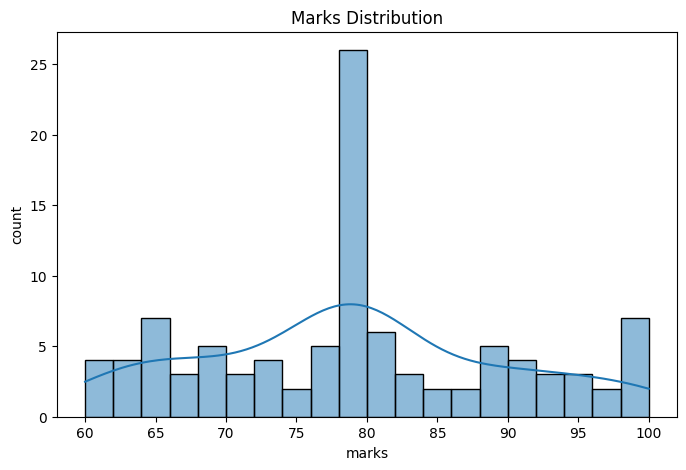

In [126]:
#distribution of marks
plt.figure(figsize=(8,5))
sns.histplot(df["Marks"],bins=20,kde=True)
plt.title("Marks Distribution")
plt.xlabel("marks")
plt.ylabel("count")
plt.show()

In [127]:
#correlation heatmap
df.columns

Index(['Student ID', 'Name', 'Class', 'Marks', 'Family Background',
       'Family Educational Background', 'Attendance (%)', 'Behavior',
       'Viva Performance', 'Submission', 'Certification', 'Achievements',
       'Hobby', 'Academic Attributes', 'Behavioral Attributes',
       'Socioeconomic Attributes', 'Psychological and Emotional',
       'Technology Usage', 'Peer Interactions', 'Cognitive Attributes',
       'Communication Skills', 'Learning Progression'],
      dtype='object')

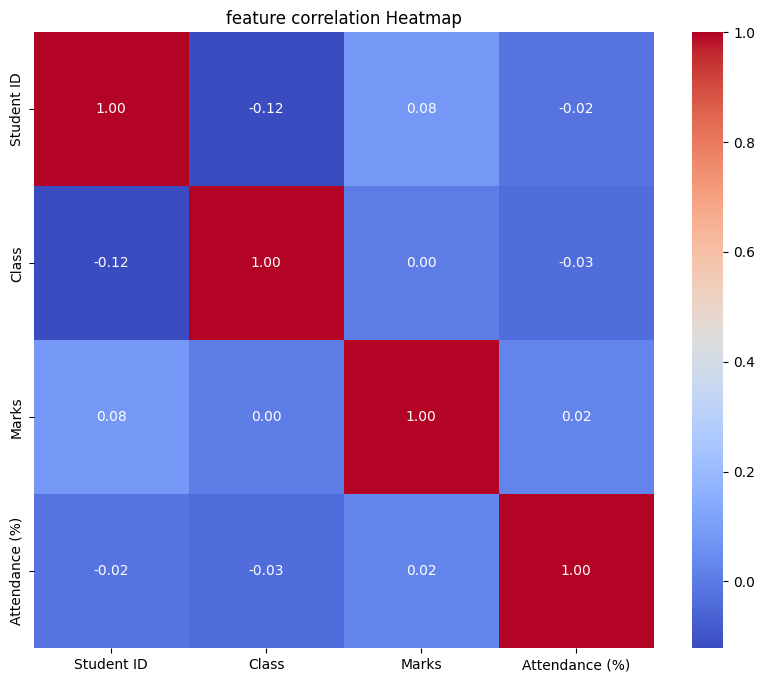

In [128]:
plt.figure(figsize=(10,8))
numerical_df=df.select_dtypes(include=["number"])
sns.heatmap(numerical_df.corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("feature correlation Heatmap")
plt.show()

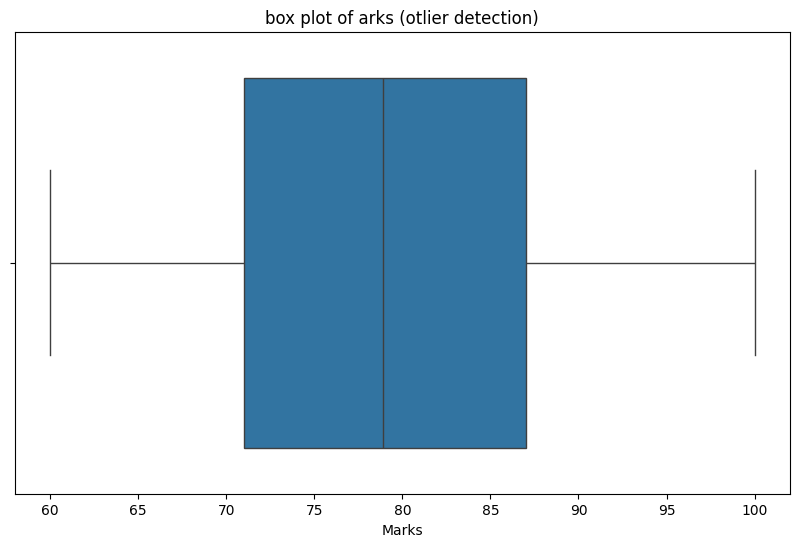

In [129]:
#box ploter for find outlier
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Marks"])
plt.title("box plot of arks (otlier detection)")
plt.show()

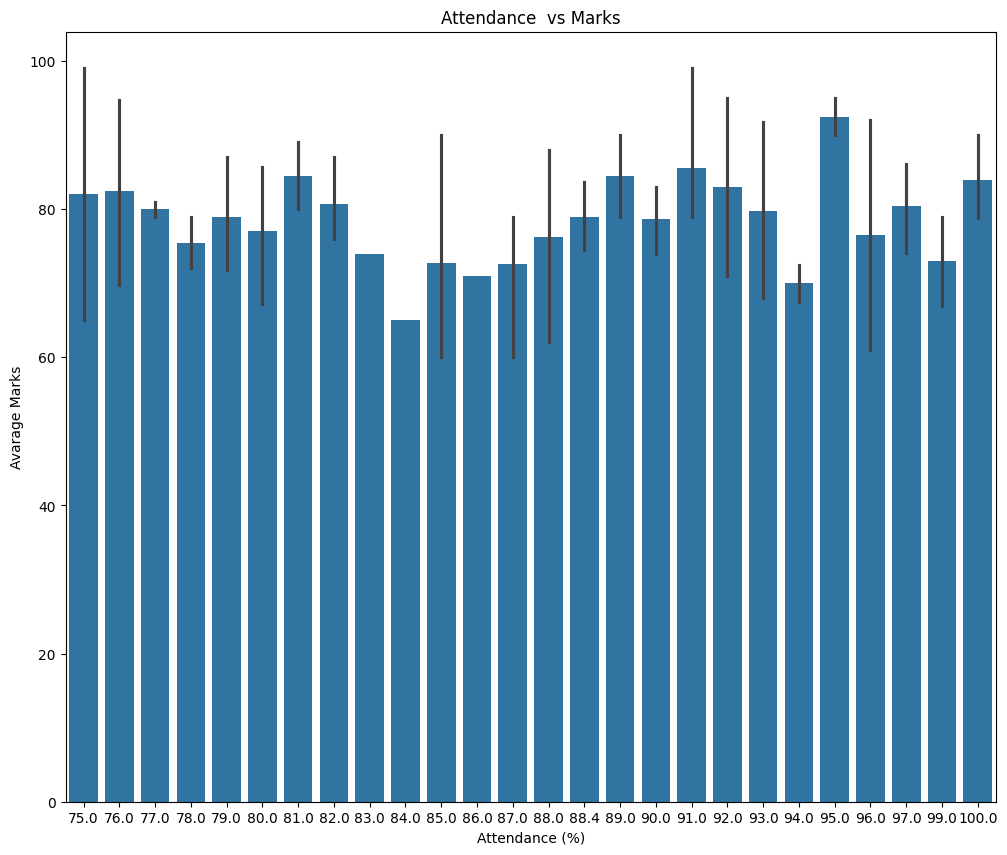

In [130]:
plt.figure(figsize=(12,10))
sns.barplot(x="Attendance (%)",y="Marks",data=df)
plt.title("Attendance  vs Marks")
plt.xlabel("Attendance (%)")
plt.ylabel("Avarage Marks")
plt.show()

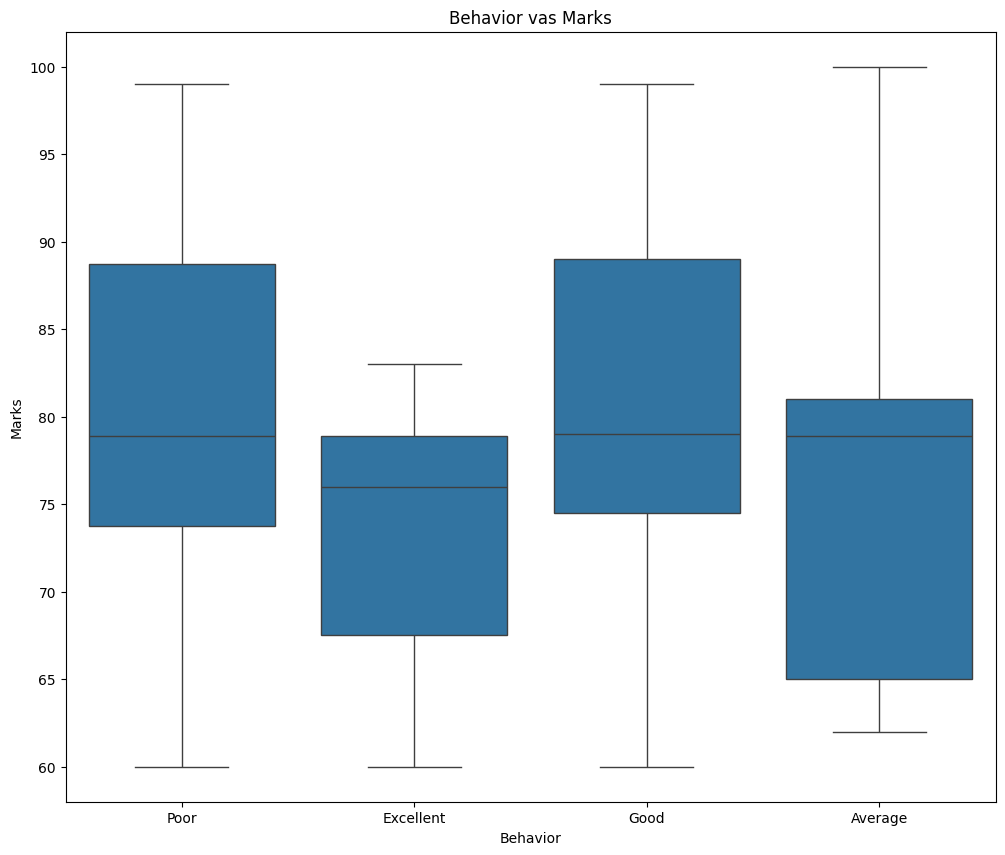

In [131]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Behavior",y="Marks",data=df)
plt.title("Behavior vas Marks")
plt.show()

In [132]:
df.isnull().sum()

Student ID                       0
Name                             0
Class                            0
Marks                            0
Family Background                0
Family Educational Background    0
Attendance (%)                   0
Behavior                         0
Viva Performance                 0
Submission                       0
Certification                    0
Achievements                     0
Hobby                            0
Academic Attributes              0
Behavioral Attributes            0
Socioeconomic Attributes         0
Psychological and Emotional      0
Technology Usage                 0
Peer Interactions                0
Cognitive Attributes             0
Communication Skills             0
Learning Progression             0
dtype: int64

In [133]:
df["Achievements"].isnull().sum()

0

In [134]:
print(df["Achievements"].head())

0    Science Fair Winner
1       Best Art Project
2    Science Fair Winner
3         Sports Captain
4    Top in Math Contest
Name: Achievements, dtype: object


In [135]:
df["Achievements"]=df["Achievements"].fillna("unknown")

In [136]:
df["Achievements"].isnull().sum()

0

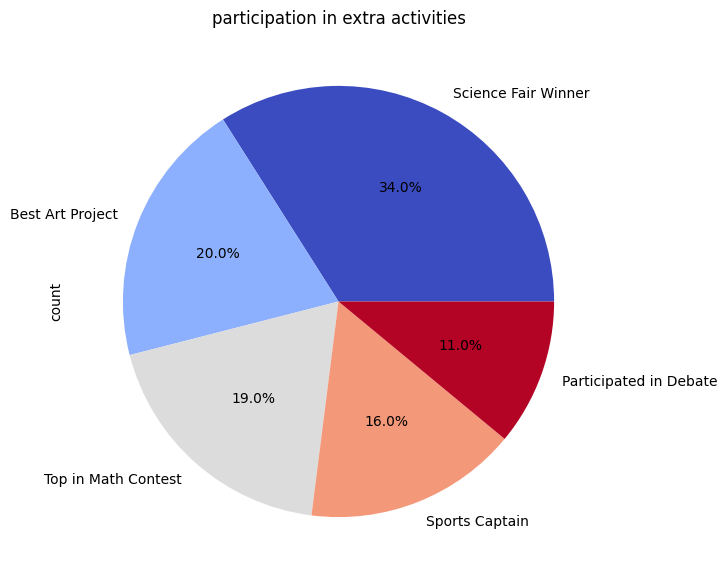

In [137]:
#participation in extra activity

df["Achievements"].value_counts().plot.pie(
    autopct="%1.1f%%",figsize=(7,7),
    cmap="coolwarm"
  )
plt.title("participation in extra activities")
plt.show()

In [138]:
df.isnull()

,Student ID,Name,Class,Marks,Family Background,Family Educational Background,Attendance (%),Behavior,Viva Performance,Submission,...,Hobby,Academic Attributes,Behavioral Attributes,Socioeconomic Attributes,Psychological and Emotional,Technology Usage,Peer Interactions,Cognitive Attributes,Communication Skills,Learning Progression
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
#feature engineering
#converting the categorical variables into numerical using label encoding
label_enc=LabelEncoder()
categorical_cols=df.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_cols:
  df[col]=label_enc.fit_transform(df[col])

scaler=StandardScaler()#Standardization ensures that all features are on the same scale to improve model performance.
df[df.columns]=scaler.fit_transform(df)

In [140]:
#dplit dataset for 80%traning & 20% testing
#feature feature x and y

x=df.drop("Marks",axis=1)#independent variable
y=df["Marks"]#Target Variable

x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=42)

print("Traning Data Shape:",x_train.shape)
print("Testing Data Shape:",x_test.shape)

Traning Data Shape: (80, 21)
Testing Data Shape: (20, 21)


In [141]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Random Forest Regressor Performance:
MAE: 0.49291132007762073
MSE: 0.4248302683903834
R² Score: -0.015830374988060614


In [142]:
from sklearn.svm import SVR

svr_model=SVR(kernel="linear")
svr_model.fit(x_train,y_train)
y_pred_svr=svr_model.predict(x_test)

print("SVR  R² Score:",r2_score(y_test,y_pred_svr))

SVR  R² Score: -1.2075888316652224


In [ ]:
with open("C:\\Users\\jadha\\OneDrive\\Desktop\\PBL-project\\rf_model.pkl", "rb") as file:
    rf_model = pickle.load(file)
